### Capstone project: Sentiment analysis on scientific papers reviews.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Re-enable warnings
# import warnings
# warnings.filterwarnings('default')

In [3]:
!pip install fsspec
!pip install -U spacy
!pip install keras tensorflow
!pip install sentiment-analysis-spanish
!python -m spacy download es_core_news_sm
!pip install es-lemmatizer
!pip install spacy_spanish_lemmatizer

Requirement already up-to-date: spacy in c:\users\isanj\anaconda3\lib\site-packages (3.0.5)


[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


2021-03-17 12:22:57.381082: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-17 12:22:57.381144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
#https://pypi.org/project/sentiment-analysis-spanish/

import pandas as pd
import numpy as np
import nltk
import json
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sentiment_analysis_spanish import sentiment_analysis

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

%matplotlib inline


In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
# Load the data file

with open('C://Users//isanj//Downloads//reviews.json', encoding="UTF-8") as f:
    data = json.load(f)    
    
#print(data)    
    

In [7]:
# Create a dataframe

reviews_df= pd.DataFrame.from_dict(data) 
  
reviews_df.head()

,paper
0,"{'id': 1, 'preliminary_decision': 'accept', 'r..."
1,"{'id': 2, 'preliminary_decision': 'accept', 'r..."
2,"{'id': 3, 'preliminary_decision': 'accept', 'r..."
3,"{'id': 4, 'preliminary_decision': 'accept', 'r..."
4,"{'id': 5, 'preliminary_decision': 'accept', 'r..."


In [8]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html

# Split a column into multiple columns
df2 = pd.json_normalize(reviews_df['paper'])
df2

,id,preliminary_decision,review
0,1,accept,"[{'confidence': '4', 'evaluation': '1', 'id': ..."
1,2,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
2,3,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
3,4,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
4,5,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
...,...,...,...
167,168,accept,"[{'confidence': '3', 'evaluation': '2', 'id': ..."
168,169,accept,"[{'confidence': '3', 'evaluation': '1', 'id': ..."
169,170,reject,"[{'confidence': '5', 'evaluation': '-1', 'id':..."
170,171,accept,"[{'confidence': '4', 'evaluation': '-1', 'id':..."


In [9]:
# Rename the "id" column as "book_id"

df2.rename(columns={'id':'book_id'}, inplace=True)
df2

,book_id,preliminary_decision,review
0,1,accept,"[{'confidence': '4', 'evaluation': '1', 'id': ..."
1,2,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
2,3,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
3,4,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
4,5,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
...,...,...,...
167,168,accept,"[{'confidence': '3', 'evaluation': '2', 'id': ..."
168,169,accept,"[{'confidence': '3', 'evaluation': '1', 'id': ..."
169,170,reject,"[{'confidence': '5', 'evaluation': '-1', 'id':..."
170,171,accept,"[{'confidence': '4', 'evaluation': '-1', 'id':..."


In [10]:
# Save df2 dataframe in a csv file
df2.to_csv('decision.csv')

In [11]:
# Check for NaN under an entire DataFrame
df2.isnull().values.any()

False

In [12]:
# Extracting just the 'review' column

column = ['review']
df3 = pd.DataFrame(df2, columns=column)
df3


,review
0,"[{'confidence': '4', 'evaluation': '1', 'id': ..."
1,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
2,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
3,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
4,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
...,...
167,"[{'confidence': '3', 'evaluation': '2', 'id': ..."
168,"[{'confidence': '3', 'evaluation': '1', 'id': ..."
169,"[{'confidence': '5', 'evaluation': '-1', 'id':..."
170,"[{'confidence': '4', 'evaluation': '-1', 'id':..."


In [13]:
# Use stack to unlist the list the column 'review'
df3_new = df3.apply(lambda x: x.apply(pd.Series).stack()).reset_index().drop('level_1', 1)
df3_new

,level_0,review
0,0,"{'confidence': '4', 'evaluation': '1', 'id': 1..."
1,0,"{'confidence': '4', 'evaluation': '1', 'id': 2..."
2,0,"{'confidence': '5', 'evaluation': '1', 'id': 3..."
3,1,"{'confidence': '4', 'evaluation': '2', 'id': 1..."
4,1,"{'confidence': '4', 'evaluation': '2', 'id': 2..."
...,...,...
400,169,"{'confidence': '5', 'evaluation': '-1', 'id': ..."
401,169,"{'confidence': '4', 'evaluation': '-1', 'id': ..."
402,170,"{'confidence': '4', 'evaluation': '-1', 'id': ..."
403,170,"{'confidence': '3', 'evaluation': '1', 'id': 2..."


In [14]:
# Use concat to unnest the dictionary and put it into seperate columns
df3_new =  pd.concat([df3_new, df3_new['review'].apply(pd.Series), df3_new.drop('review', axis=1, inplace = True)], axis=1)
df3_new

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,1,4,2,2,es,0,,,2010-07-05
...,...,...,...,...,...,...,...,...,...
400,169,5,-1,1,es,-2,,El trabajo pretende ofrecer una visión del uso...,2015-07-05
401,169,4,-1,2,es,-1,,El paper está bien escrito y de fácil lectura....,2015-07-05
402,170,4,-1,1,es,0,,Observación de fondo: No se presenta un ejemp...,2015-07-05
403,170,3,1,2,es,-1,,Se propone un procedimiento para elaborar máqu...,2015-07-05


In [15]:
# # Use concat to unnest the dictionary and put it into seperate columns
# df3_new = pd.concat([df3.drop('review', axis=1, inplace = True), df3_new['review'].apply(pd.Series)], axis=1)
# df3_new

In [16]:
#get the dataframe columns
cols = df3_new.columns 

#print the columns' names
#print(cols)

In [17]:
# Check for NaN under an entire DataFrame
df3_new.isnull().values.any()

True

In [18]:
# I can see have some missing data

df3_new["text"].iloc[40]

''

In [19]:
# Shape before dropping empty rows text
df3_new.shape

(405, 9)

In [20]:
# Drop empty rows text

filter_na = df3_new["text"] != ''
df4 = df3_new[filter_na]

In [21]:
# Shape after dropping empty rows text
df4.shape

(399, 9)

In [22]:
df4.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
5,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05


In [23]:
#Fix indexes

df4 = df4.reset_index(drop = True)

df4.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05


In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   level_0      399 non-null    int64 
 1   confidence   397 non-null    object
 2   evaluation   399 non-null    object
 3   id           399 non-null    int64 
 4   lan          399 non-null    object
 5   orientation  399 non-null    object
 6   remarks      399 non-null    object
 7   text         399 non-null    object
 8   timespan     399 non-null    object
dtypes: int64(2), object(7)
memory usage: 28.2+ KB


### Identified reviews based on the language

In [25]:
df4.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05


In [26]:
df4.lan.unique()

array(['es', 'en'], dtype=object)

In [27]:
# Count each unique value

df4.lan.value_counts()

es    382
en     17
Name: lan, dtype: int64

In [28]:
df4.groupby('lan').describe()

level_0                                                           id  \
      count       mean        std  min   25%   50%     75%    max  count   
lan                                                                        
en     17.0  58.647059  62.012036  2.0   7.0  32.0  127.00  161.0   17.0   
es    382.0  86.065445  48.741252  0.0  41.0  92.5  125.75  171.0  382.0   

                                                  
         mean       std  min  25%  50%  75%  max  
lan                                               
en   1.882353  0.781213  1.0  1.0  2.0  2.0  3.0  
es   1.832461  0.824935  1.0  1.0  2.0  2.0  4.0

In [29]:
# English reviews

df4_english = df4[df4['lan']=='en']
df4_english

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
6,2,3,2,2,en,1,,This paper aims to show new deployment alterna...,2010-07-05
7,2,3,0,3,en,-1,,The paper is well structured. It follows a log...,2010-07-05
18,7,4,1,1,en,0,,The paper describes an experience concerning t...,2010-07-05
19,7,4,2,2,en,1,,This manuscript addresses an interesting solut...,2010-07-05
20,7,5,1,3,en,0,,Interesting application domain. Nothing new f...,2010-07-05
29,11,3,2,2,en,0,,This paper presents a software tool that is us...,2010-07-05
45,18,4,2,1,en,1,,"This paper is very interesting, I like the ide...",2010-07-05
73,29,4,-2,1,en,-1,,I don't think the work reported in this paper ...,2010-07-05
83,32,4,-1,2,en,-1,Unless there is a strong info sci and business...,Abstract: Needs to have a definition of ERP - ...,2010-07-05
94,37,4,2,1,en,0,,The paper introduces a segmentation procedure ...,2010-07-05


In [30]:
# Spanish reviews

df4_spanish = df4[df4['lan']=='es']
df4_spanish.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05


In [31]:
##############################################################################

#### Identify the languages by myself

In [32]:
!pip install langid

In [33]:
import langid # language identification (i.e. what language is this?)

In [34]:
# Identified languages 

diff_languages = (df4['text']).apply(langid.classify)
diff_languages.head()

0    (es, -2286.3553416728973)
1      (es, -2561.28048992157)
2     (es, -4911.551350593567)
3     (es, -4179.394695520401)
4     (es, -7130.180345535278)
Name: text, dtype: object

In [35]:
# Extract just the language 
langs = diff_languages.apply(lambda tuple: tuple[0])
langs.unique()
#langs

array(['es', 'en', 'lt'], dtype=object)

In [36]:
# Count the english 
print(sum(langs== "en"))   # The result is higher "23 texts in english, against the 17 expected". I have to find out why?

17


In [37]:
# Put everything in a list 
langs_list = list(langs)
#langs_list

In [38]:
# List of the indexes of all the reviews in english
res_list = [] 
for i in range(0, len(langs_list)) : 
    if langs_list[i] == str('en') : 
        res_list.append(i)
        
#res_list        

In [39]:
# Let check for empty string in the list of texts

for i in res_list:
    if (df4["text"].iloc[i]== ''):
        print(i)    

In [40]:
print(sum(langs=="es"))

381


In [41]:
#  Check if any missing values in the spanish texts

for i in range(0, len(langs_list)): 
    if langs_list[i] == "es":
        if (df4["text"].iloc[i]== ''):
            print(i)
        else:
            break
print("No missing values")

No missing values


In [42]:
print(sum(langs=="lt"))

1


In [43]:
for i in range(0, len(langs_list)):
    if langs_list[i] == "lt":
        print(df4["text"].iloc[i])

NO ME ENCUENTRO CAPACITADO PARA EFECTUAR ESTA REVISION. ESTA MUY LEJOS DE MI ESPECIALIZACION.


In [44]:
#####################################################################

In [45]:
# Length of all the text reviews
df4["length"] = df4["text"].apply(len)
df4.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,575
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,618
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,1938


In [46]:
# Visualize the length of the reviews

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

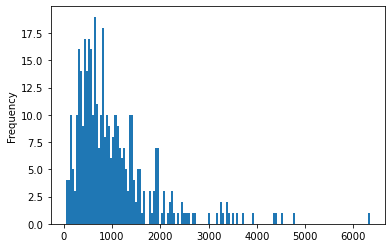

In [48]:
#df4["length"].plot.hist(bins=50)
#df4["length"].plot.hist(bins=100)
df4["length"].plot.hist(bins=150)

In [49]:
df4["length"].describe()

count     399.000000
mean     1020.105263
std       829.020524
min        41.000000
25%       473.000000
50%       811.000000
75%      1287.500000
max      6345.000000
Name: length, dtype: float64

In [50]:
# # The longest review

# df4[df4["length"]==6345]["text"].iloc[0]

### Text Pre-processing using NLTK

In [51]:
# Using spanish text from the original dataset.

In [52]:
df4_spanish.shape

(382, 9)

In [53]:
# Checking for missing values
df4_spanish.isnull().sum()

level_0        0
confidence     2
evaluation     0
id             0
lan            0
orientation    0
remarks        0
text           0
timespan       0
dtype: int64

In [54]:
def cleanText(review):
    
    # split into words

    tokens = word_tokenize(review)
        
    # convert to lower case
    review_tokens = [w.lower() for w in tokens]
        
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    review_no_punct = [w.translate(table) for w in review_tokens]
    
    # remove remaining tokens that are not alphabetic
    
    review_tokens_new = [word for word in review_no_punct if word.isalpha()]
    
    # filter out stop words
    clean_token = [w for w in review_tokens_new if not w in stop_words]
    

    
    return clean_token
        

In [55]:
df4_spanish['New_text'] = (df4_spanish["text"]).apply(cleanText)

df4_spanish.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,New_text
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,"[artículo, aborda, problema, contingente, rele..."
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,"[artículo, presenta, recomendaciones, práctica..."
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,"[tema, interesante, puede, ser, mucha, ayuda, ..."
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,"[explica, forma, ordenada, didáctica, experien..."
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,"[autores, describen, metodología, desarrollar,..."


In [56]:
# Lemmatization

lemmatizer = WordNetLemmatizer()
def lemm(words):
    new = []
    lemma_words = [lemmatizer.lemmatize(x) for x in words]
    new.append(lemma_words)
    return new



df4_spanish["text_lemmatized"] = (df4_spanish['New_text']).apply(lemm)

df4_spanish.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,New_text,text_lemmatized
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,"[artículo, aborda, problema, contingente, rele...","[[artículo, aborda, problema, contingente, rel..."
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,"[artículo, presenta, recomendaciones, práctica...","[[artículo, presenta, recomendaciones, práctic..."
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,"[tema, interesante, puede, ser, mucha, ayuda, ...","[[tema, interesante, puede, ser, mucha, ayuda,..."
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,"[explica, forma, ordenada, didáctica, experien...","[[explica, forma, ordenada, didáctica, experie..."
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,"[autores, describen, metodología, desarrollar,...","[[autores, describen, metodología, desarrollar..."


In [57]:
# Seems like NLTK doesn't work well on Spanish Lemmatization 

### Text Pre-processing using SpaCy

In [58]:
import spacy
import es_core_news_sm
import spacy_spanish_lemmatizer
from spacy.lang.es.stop_words import STOP_WORDS


In [59]:
nlp = es_core_news_sm.load()

In [60]:
# Extract just Spanish reviews
df4_spanish_spacy = df4[df4['lan']=='es']

In [61]:
#List punctuation
punctuations = list(string.punctuation)
punctuations

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [62]:
len(punctuations)

32

In [63]:
# This list doesn't have the upside down question mark "¿"

In [64]:
# Data cleaning
# convert to lower-case, remove square brackets, numbers, and punctuations
def text_clean(review):
    review = review.lower()
    review = re.sub('\[.*?\]', '', review)
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = re.sub('\n', '', review)# remove new lines
    review =re.sub('¿', '', review) # Remove "¿"(It isn't part of the punctuations list) 
    return review

review_clean = lambda x: text_clean(x)


In [65]:
df4_spanish_spacy['new_text'] = df4_spanish_spacy["text"].apply(text_clean)
df4_spanish_spacy.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length,new_text
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,575,el artículo aborda un problema contingente y ...
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,618,el artículo presenta recomendaciones prácticas...
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259,el tema es muy interesante y puede ser de muc...
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350,se explica en forma ordenada y didáctica una e...
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,1938,los autores describen una metodología para des...


In [66]:
# If the substring doesn’t exist in the text, -1 is returned. 
# Otherwise it will return the position first occurrence of character in the string.

df4_spanish_spacy['new_text'].str.find("¿").unique() # I'm using unique to see how many different characters in the column

array([-1], dtype=int64)

In [67]:
# Build list of stopwords
stopwords = list(STOP_WORDS)
stopwords

['varias',
 'llegó',
 'vuestros',
 'cuenta',
 'podria',
 'sólo',
 'menos',
 'esto',
 'somos',
 'anterior',
 'cosas',
 'cuál',
 'tenemos',
 'estan',
 'vais',
 'tenía',
 'comentó',
 'mias',
 'segunda',
 'también',
 'suyas',
 'contra',
 'cerca',
 'unas',
 'alguna',
 'se',
 'nuevo',
 'parte',
 'una',
 'teneis',
 'realizado',
 'tengo',
 'sobre',
 'otra',
 'solas',
 'cuales',
 'mismo',
 'esta',
 'porque',
 'suyo',
 'tus',
 'dejó',
 'misma',
 'durante',
 'nos',
 'desde',
 'temprano',
 'cuando',
 'nuestras',
 'dias',
 'tampoco',
 'pesar',
 'ademas',
 'estais',
 'actualmente',
 'cuántas',
 'muchos',
 'sabemos',
 'seis',
 'ningunas',
 'he',
 'enfrente',
 'lejos',
 'señaló',
 'usas',
 'segundo',
 'eso',
 'quiénes',
 'podriamos',
 'poder',
 'demasiado',
 'mio',
 'ultimo',
 'pasado',
 'nuestros',
 'ella',
 'ejemplo',
 'mí',
 'menudo',
 'con',
 'mia',
 'aquél',
 'buenos',
 'siempre',
 'nosotras',
 'sería',
 'voy',
 'aquélla',
 'día',
 'algo',
 'allí',
 'través',
 'hoy',
 'propias',
 'conocer',
 'pro

In [68]:
len(stopwords)

551

In [69]:
#Create a custom stopwords 
custom_stop_word_list=['más', 'o', 'a']

In [70]:
# Final stopwords list

final_stopword_list = custom_stop_word_list + stopwords

In [71]:
# Remove stop words

df4_spanish_spacy['new_text'] = df4_spanish_spacy['new_text'].apply(lambda x: " ".join(word for word in x.split() if word not in final_stopword_list))

df4_spanish_spacy['new_text'].head()

0    artículo aborda problema contingente y relevan...
1    artículo presenta recomendaciones prácticas de...
2    tema interesante y ayuda guía incorporar práct...
3    explica forma ordenada y didáctica experiencia...
4    autores describen metodología desarrollar form...
Name: new_text, dtype: object

In [72]:
# Lemmatization
def lemm(review):
    nlp=spacy.load("es_core_news_sm")
    doc = nlp(str(review))
    return " ".join([token.lemma_ for token in doc])

df4_spanish_spacy['Lemma_text'] = df4_spanish_spacy['new_text'].apply(lemm)
df4_spanish_spacy.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length,new_text,Lemma_text
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,575,artículo aborda problema contingente y relevan...,artículo abordo problema contingente y relevan...
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,618,artículo presenta recomendaciones prácticas de...,artículo presentar recomendación práctico desa...
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259,tema interesante y ayuda guía incorporar práct...,tema interesante y ayuda guío incorporar práct...
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350,explica forma ordenada y didáctica experiencia...,explicar forma ordenado y didáctico experienci...
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,1938,autores describen metodología desarrollar form...,autor describir metodología desarrollar forma ...


In [73]:
#Spacy seems to be better for spanish lemmatization

In [74]:
# Length of all the Lemma text reviews
df4_spanish_spacy["Lemma_length"] = df4_spanish_spacy["Lemma_text"].apply(len)
df4_spanish_spacy.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length,new_text,Lemma_text,Lemma_length
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,575,artículo aborda problema contingente y relevan...,artículo abordo problema contingente y relevan...,331
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,618,artículo presenta recomendaciones prácticas de...,artículo presentar recomendación práctico desa...,433
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259,tema interesante y ayuda guía incorporar práct...,tema interesante y ayuda guío incorporar práct...,752
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350,explica forma ordenada y didáctica experiencia...,explicar forma ordenado y didáctico experienci...,911
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,1938,autores describen metodología desarrollar form...,autor describir metodología desarrollar forma ...,1178


In [75]:
# Save this dataframe (df4_spanish_spacy) in a csv file
df4_spanish_spacy.to_csv('lemma.csv')


In [76]:
# Part of speech(POS) tagging

doc = nlp(df4_spanish_spacy["Lemma_text"].to_string(index=False))

for token in doc:
    print(token.text, token.pos_)

  SPACE
artículo NOUN
abordo ADJ
problema NOUN
contingente ADV
y CCONJ
relevan VERB
... PUNCT

  SPACE
artículo VERB
presentar VERB
recomendación NOUN
práctico ADJ
desa ADJ
... PUNCT

  SPACE
tema NOUN
interesante ADJ
y CCONJ
ayuda NOUN
guío VERB
incorporar VERB
práct NOUN
... PUNCT

  SPACE
explicar VERB
forma NOUN
ordenado ADJ
y CCONJ
didáctico ADJ
experienci ADJ
... PUNCT

  SPACE
autor NOUN
describir VERB
metodología NOUN
desarrollar VERB
forma NOUN
... PUNCT

  SPACE
proponer VERB
enfocar VERB
basado ADJ
apoyar VERB
recomendación NOUN
r CCONJ
... PUNCT

  SPACE
realizar VERB
modelamiento NOUN
encriptación NOUN
cuánticar VERB
n NOUN
... PUNCT

  SPACE
paper NOUN
involucra ADJ
desarrollo NOUN
aplicación NOUN
simule ADJ
p CCONJ
... PUNCT

  SPACE
novedoso ADJ
propuesta ADJ
estructurado ADJ
correctamente ADV
... PUNCT

  SPACE
tema NOUN
interesante ADJ
y CCONJ
estructurado ADJ
referir VERB
diseño ADJ
... PUNCT

  SPACE
alto ADJ
perfil NOUN
técnico ADJ
aportar VERB
temática NOUN
concis

mostrar VERB
resultado NOUN
desarrollo ADJ
cbir VERB
basado ADJ
índic ADJ
... PUNCT

  SPACE
artículo NOUN
construcción NOUN
sistema ADJ
recuperación NOUN
ima ADJ
... PUNCT

  SPACE
publicación NOUN
objetivo ADJ
mostrar VERB
bondad NOUN
estructura ADJ
... PUNCT

  SPACE
comentario NOUN
general ADJ
• PROPN
recomendar VERB
revisar VERB
escrit NOUN
... PUNCT

  SPACE
artículo NOUN
prometer VERB
presentar VERB
método NOUN
medir VERB
calid NOUN
... PUNCT

  SPACE
interesante ADJ
simulación NOUN
entorno ADJ
urbano ADJ
simular ADJ
... PUNCT

  SPACE
interesante ADJ
autor NOUN
mostrar VERB
honeynet NOUN
medido ADJ
segu ADJ
... PUNCT

  SPACE
resumen NOUN
describir VERB
paso NOUN
seguir VERB
aplicar VERB
concepto NOUN
... PUNCT

  SPACE
artículo NOUN
artículo ADJ
investigación NOUN
mostrar VERB
progra NOUN
... PUNCT

  SPACE
revisor NOUN
presentar VERB
contribución NOUN
científico ADJ
dire ADJ
... PUNCT

  SPACE
artículo NOUN
proponer VERB
sistema NOUN
agregar VERB
componente NOUN
d INTJ
... PU

presentar VERB
método NOUN
algorítmico ADJ
clasificación NOUN
cal ADJ
... PUNCT

  SPACE
presentar VERB
novedoso ADJ
contribuir VERB
arte NOUN
método NOUN
clas ADJ
... PUNCT

  SPACE
abordo NOUN
problema NOUN
navegación NOUN
autónomo ADJ
robot VERB
móvi NOUN
... PUNCT

  SPACE
artículo NOUN
presentar VERB
caso NOUN
aplicación NOUN
arquitectur ADJ
... PUNCT

  SPACE
tema NOUN
referente ADJ
problemático ADJ
navegación NOUN
autónom ADJ
... PUNCT

  SPACE
concuerdo ADJ
escrito ADJ
parágrafo ADJ
introducción NOUN
soluc ADJ
... PUNCT

  SPACE
preliminar VERB
experimento NOUN
y CCONJ
resultado NOUN
análisi VERB
enf VERB
... PUNCT

  SPACE
presentar VERB
aproximación NOUN
programación NOUN
proyecto ADJ
a ADP
... PUNCT

  SPACE
preparado ADJ
técnicamente ADV
estructura NOUN
y CCONJ
redacción NOUN
... PUNCT

  SPACE
artículo NOUN
proponer VERB
aplicación NOUN
diagrama VERB
classer ADJ
... PUNCT

  SPACE
artículo NOUN
cumplir VERB
formato NOUN
establecido ADJ
y CCONJ
poseer VERB
... PUNCT

  SPAC

  SPACE
documento NOUN
reflejar VERB
equipo NOUN
dominio NOUN
tecnologío ADJ
n PROPN
... PUNCT

  SPACE
mostrar VERB
desarrollado ADJ
construcción NOUN
aplicación NOUN
w VERB
... PUNCT

  SPACE
presentar VERB
solución NOUN
problemático ADJ
real ADJ
interesan VERB
... PUNCT

  SPACE
artículo VERB
presentar VERB
desarrollo NOUN
aplicación NOUN
móvil ADJ
... PUNCT

  SPACE
aplicación NOUN
recurso ADJ
desarrollo NOUN
disponible ADJ
tecno NOUN
... PUNCT

  SPACE
comentario NOUN
artículo VERB
formar VERB
• NOUN
problema NOUN
mayúscul VERB
... PUNCT

  SPACE
artículo NOUN
simple ADJ
desarrollo NOUN
aplicación NOUN
generar VERB
... PUNCT

  SPACE
resumen NOUN
presentaofrece ADJ
aplicación NOUN
web ADJ
móvil NOUN
pe DET
... PUNCT

  SPACE
artículo VERB
presentar VERB
desarrollo NOUN
aplicación NOUN
móvil ADJ
... PUNCT

  SPACE
artículo NOUN
presentar VERB
propuesta NOUN
reparación NOUN
incons ADJ
... PUNCT

  SPACE
difícil ADJ
catalogar VERB
presento ADJ
tema NOUN
usualmente ADV
aso ADJ
... PUN

In [77]:
## Check if any forgotten punctuations
df4_spanish_spacy.Lemma_text[396]

'observación fondo presentar implementación interesante máquina secuencial metodolgía propuesto y tradicional cableado establecer comparativo y métrica desempeño observación formar siguiente corrección omitir punto título español páginar columna entrado y variable máquina secuencial págín columna justificación izquierdo págín columnar cantidad puerto entrado y salid págín columna completo dirección máquinar considerando sumo págín columna máquinar considerando sumar'

In [78]:
# Visualize dependencies and entities 
from spacy import displacy 

spacy.displacy.render(doc, style = 'dep')